In [240]:
import pymysql.cursors

connection = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Mugdha2002",
    database="Mental_Health"
)

if connection.open:
    print("Successfully connected to the database")
else:
    print("Connection failed")

Successfully connected to the database


In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

def fetch_data(query):
    """Fetch data from the database."""
    return pd.read_sql(query, connection)

### What is the percentage distribution of employee participation across different wellness programs in the organization?


/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


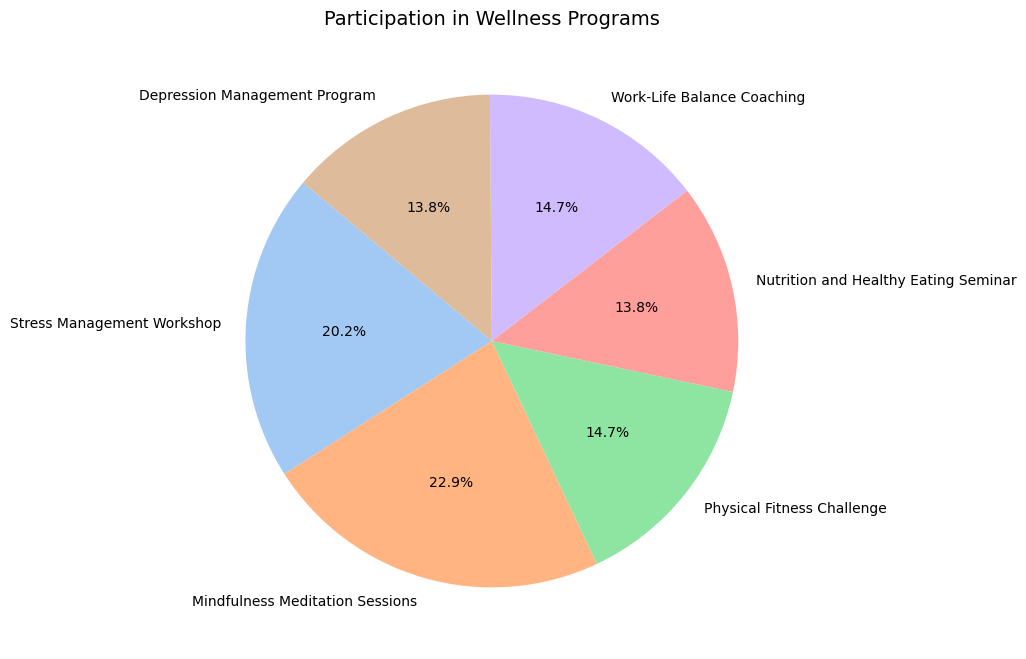

In [244]:
query = """
SELECT wp.Description AS Program, COUNT(ewp.Emp_ID) AS Participants
FROM Wellness_Program wp
INNER JOIN Employee_Wellness_Program ewp ON wp.Program_ID = ewp.Program_ID
GROUP BY wp.Description;
"""
df = fetch_data(query)

plt.figure(figsize=(8, 8))
plt.pie(df['Participants'], labels=df['Program'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Participation in Wellness Programs', fontsize=14)
plt.show()

The pie chart shows employee participation in wellness programs. Mindfulness Meditation Sessions had the highest participation (22.9%), followed by Stress Management Workshop (20.2%). Physical Fitness Challenge and Work-Life Balance Coaching each had 14.7%, while Depression Management Program and Nutrition and Healthy Eating Seminar had the lowest (13.8%). The focus is on mental health and stress management.

### How many high-risk employees are there in each department?

/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


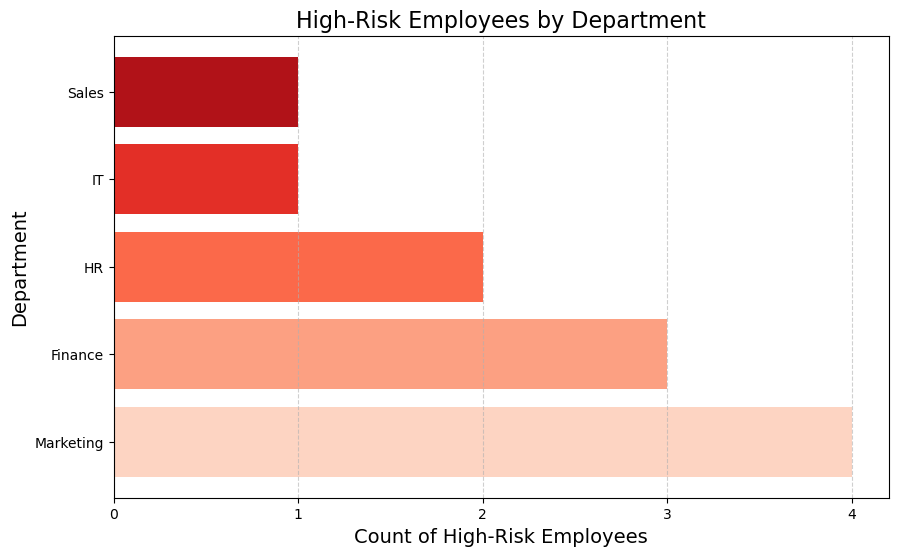

In [247]:
query = """
SELECT e.Department, COUNT(r.Emp_ID) AS High_Risk_Count
FROM Report r
INNER JOIN Employee e ON r.Emp_ID = e.Emp_ID
WHERE r.High_Risk_Employees = 'High'
GROUP BY e.Department;
"""
df = fetch_data(query)

from matplotlib.ticker import MaxNLocator

df = df.sort_values('High_Risk_Count', ascending=False)

colors = sns.color_palette("Reds", len(df))
plt.figure(figsize=(10, 6))
plt.barh(df['Department'], df['High_Risk_Count'], color=colors)

plt.title('High-Risk Employees by Department', fontsize=16)
plt.xlabel('Count of High-Risk Employees', fontsize=14)
plt.ylabel('Department', fontsize=14)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

This bar chart displays the distribution of high-risk employees across departments. The Marketing department has the highest number of high-risk employees (4), followed by Finance (3) and HR (2). The IT and Sales departments each have 1 high-risk employee. This indicates that the Marketing and Finance departments may require immediate focus for risk mitigation.

### Which programs require the most sessions, and how do they compare?

/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)
/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/948774921.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Session_Count', y='Program', palette='Blues_r')


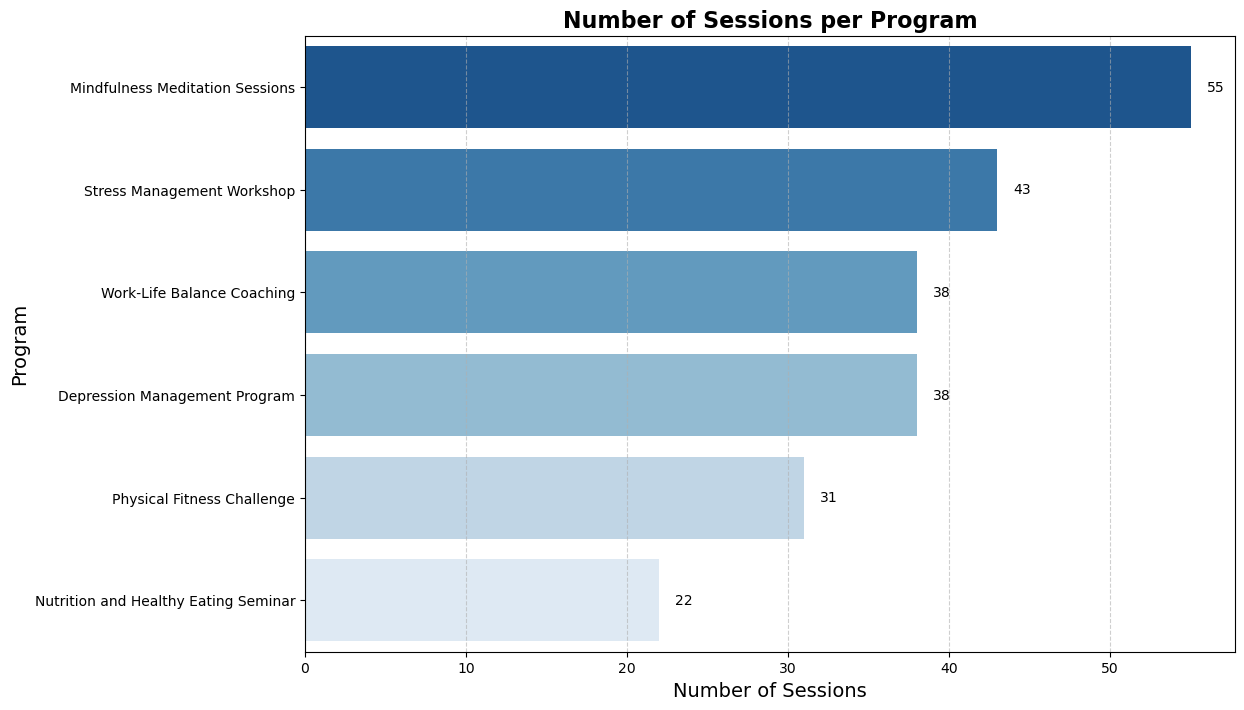

In [267]:
query = """
SELECT wp.Description AS Program, COUNT(s.Session_ID) AS Session_Count
FROM Wellness_Program wp
INNER JOIN Employee_Wellness_Program ewp ON wp.Program_ID = ewp.Program_ID
INNER JOIN Session s ON ewp.Emp_ID = s.Emp_ID
GROUP BY wp.Description
ORDER BY Session_Count DESC;
"""
df = fetch_data(query)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Session_Count', y='Program', palette='Blues_r')

# Add value labels
for i, value in enumerate(df['Session_Count']):
    plt.text(value + 1, i, str(value), va='center', fontsize=10)

# Title and labels
plt.title('Number of Sessions per Program', fontsize=16, fontweight='bold')
plt.xlabel('Number of Sessions', fontsize=14)
plt.ylabel('Program', fontsize=14)

# Gridlines and formatting
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

This bar chart shows the number of sessions conducted for each wellness program. Mindfulness Meditation Sessions had the highest number of sessions(55), followed by the Stress Management Workshop. Work-Life Balance Coaching andd  Depression Management Program had same number of sessions which is 38. Physical Fitness Challenge, and Nutrition and Healthy Eating Seminar had fewer sessions. This indicates a strong focus on mental/mind health and stress management programs through frequent sessions.

### How does participation in wellness programs vary over time?

/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


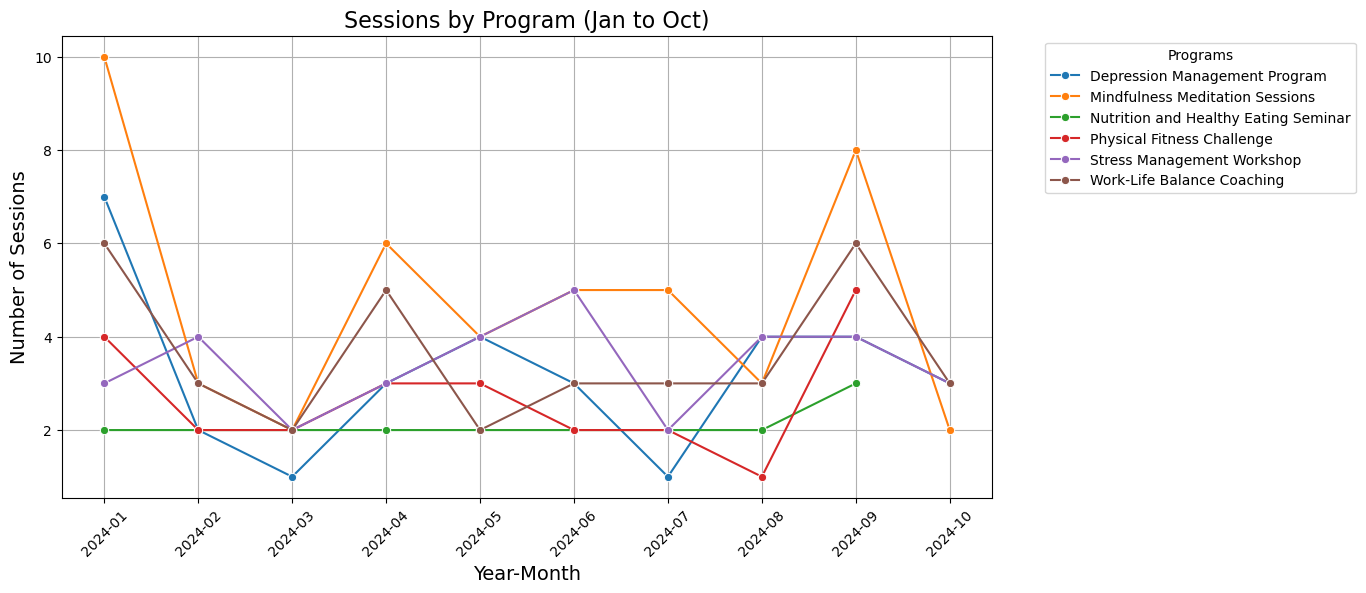

In [270]:
query = """
SELECT DATE_FORMAT(s.Session_Date, '%Y-%m') AS YearMonth, 
       wp.Description AS Program, 
       COUNT(s.Session_ID) AS Sessions
FROM Session s
INNER JOIN Employee_Wellness_Program ewp ON s.Emp_ID = ewp.Emp_ID
INNER JOIN Wellness_Program wp ON ewp.Program_ID = wp.Program_ID
WHERE MONTH(s.Session_Date) BETWEEN 1 AND 10
GROUP BY YearMonth, wp.Description
ORDER BY YearMonth;
"""
df = fetch_data(query)

df = df[df['YearMonth'].str.endswith(('-01', '-02', '-03', '-04', '-05', '-06', '-07', '-08', '-09', '-10'))]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YearMonth', y='Sessions', hue='Program', marker='o', palette='tab10')

plt.title('Sessions by Program (Jan to Oct)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Sessions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Programs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This line chart illustrates the number of sessions conducted per program from January to October 2024.

	• Mindfulness Meditation Sessions consistently had peaks, notably in January and September, indicating a higher frequency during those months.
	• Stress Management Workshop and Work-Life Balance Coaching had moderate activity throughout the year, with occasional increases.
	• Nutrition and Healthy Eating Seminar, Depression Management Program, and Physical Fitness Challenge had fewer sessions overall, with sporadic increases during certain months.
	• The chart highlights fluctuating trends in program sessions, suggesting varying organizational priorities or participation rates over time.

### What is the distribution of satisfaction ratings across programs?

/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


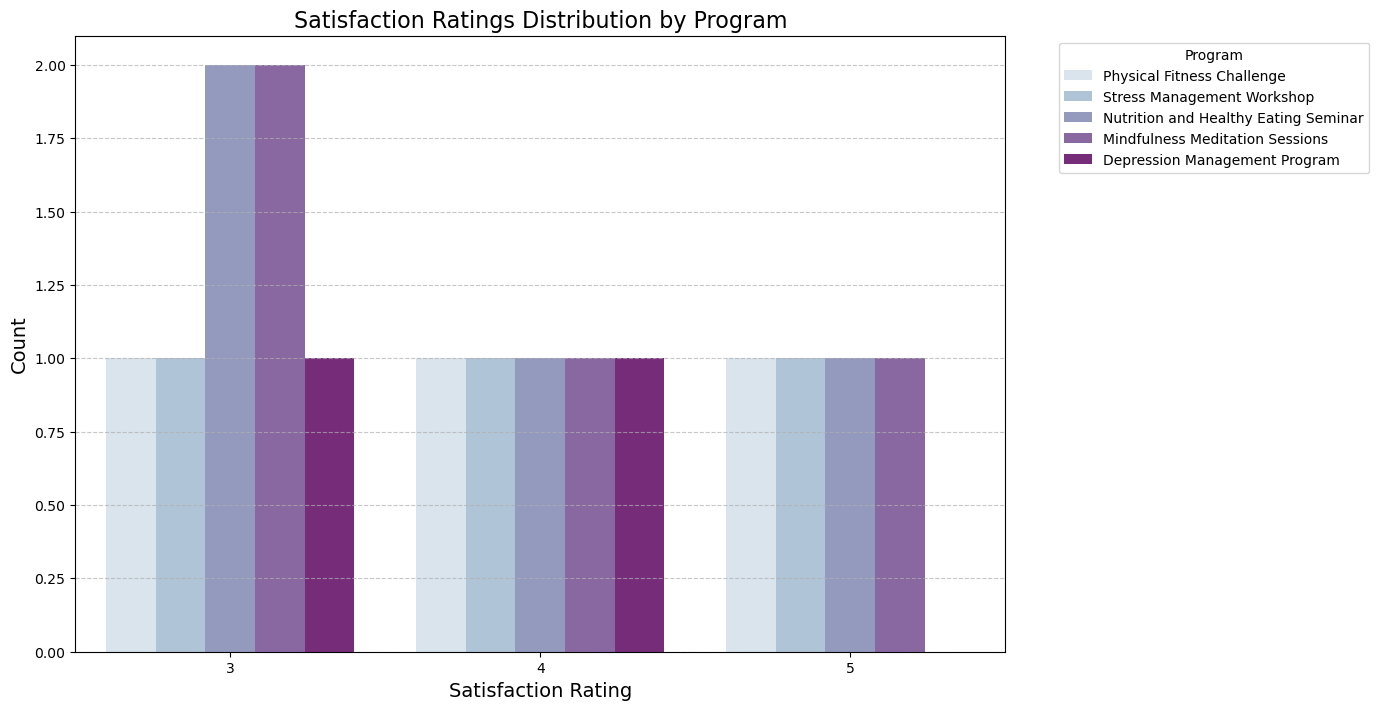

In [273]:
query = """
SELECT wp.Description AS Program, ef.Rating
FROM Employee_Feedback ef
INNER JOIN Employee_Wellness_Program ewp ON ef.Emp_ID = ewp.Emp_ID
INNER JOIN Wellness_Program wp ON ewp.Program_ID = wp.Program_ID;
"""
df = fetch_data(query)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Rating', hue='Program', palette='BuPu')
plt.title('Satisfaction Ratings Distribution by Program', fontsize=16)
plt.xlabel('Satisfaction Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This bar chart shows the distribution of satisfaction ratings (3 to 5) across various wellness programs.

	• Most programs have a relatively balanced distribution of ratings across 3, 4, and 5.
	• Mindfulness Meditation Sessions and Stress Management Workshop received a higher count of mid-level ratings (3) compared to others.
	• Other programs, such as the Physical Fitness Challenge and Depression Management Program, exhibit a more uniform distribution of ratings.
	• Overall, the chart highlights that most programs have a mix of satisfaction ratings, with no program showing extreme polarities.

### What is the distribution of satisfaction ratings across programs?

/var/folders/z8/grk0723564lcr7tmdfzwv5p00000gn/T/ipykernel_5461/1403849020.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


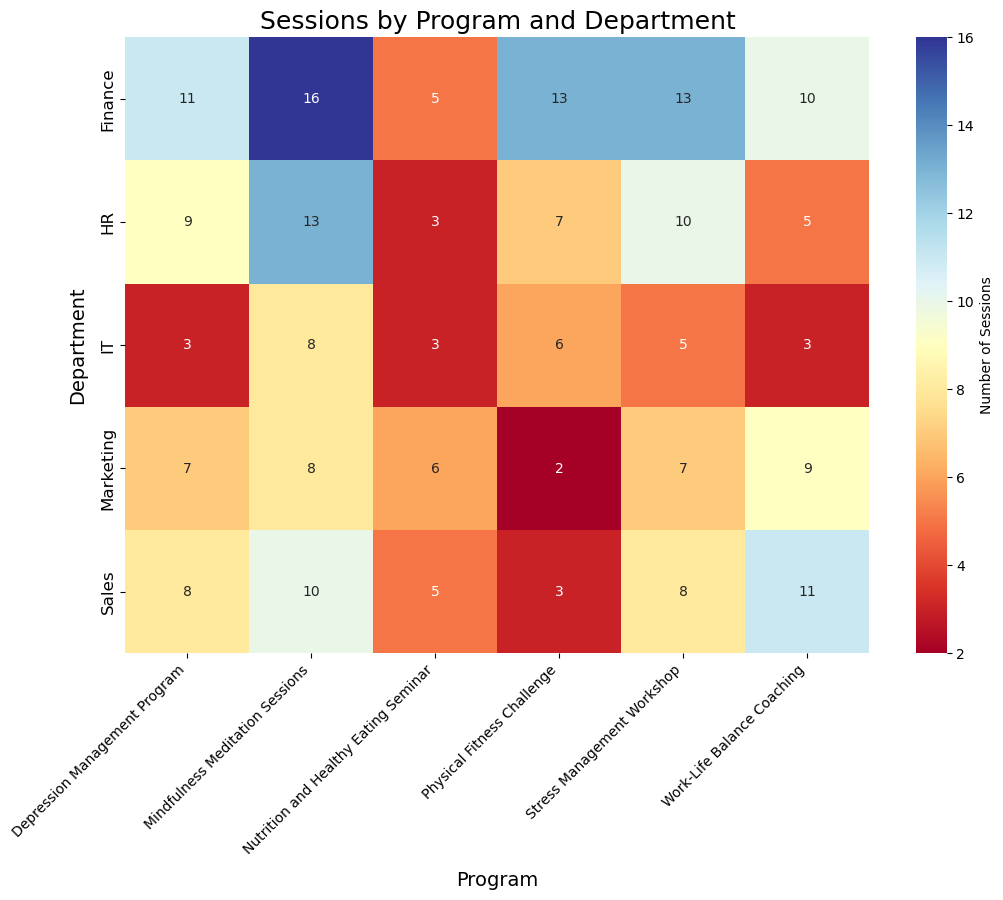

In [276]:
query = """
SELECT e.Department, wp.Description AS Program, COUNT(s.Session_ID) AS Session_Count
FROM Employee e
INNER JOIN Employee_Wellness_Program ewp ON e.Emp_ID = ewp.Emp_ID
INNER JOIN Wellness_Program wp ON ewp.Program_ID = wp.Program_ID
INNER JOIN Session s ON ewp.Emp_ID = s.Emp_ID
GROUP BY e.Department, wp.Description
ORDER BY e.Department, wp.Description;
"""
df = fetch_data(query)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.iloc[:-1, :-1], annot=True, fmt=".0f", cmap='RdYlBu', cbar_kws={'label': 'Number of Sessions'})

plt.title('Sessions by Program and Department', fontsize=18)
plt.xlabel('Program', fontsize=14, labelpad=10)  # Add padding to separate the label from ticks
plt.ylabel('Department', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels at a 45-degree angle
plt.yticks(fontsize=12)  # Make y-axis labels easier to read
plt.show()

This heatmap shows the distribution of sessions across programs and departments.

	• Finance conducted the highest number of sessions (16) for Mindfulness Meditation Sessions, followed by 13 sessions for Stress Management Workshop and Physical Fitness Challenge.
	• HR also had a notable number of sessions for Mindfulness Meditation Sessions (13).
	• Departments like IT had fewer sessions across most programs, with a maximum of 8 for Mindfulness Meditation Sessions.
	• Sales and Marketing had moderate activity, with sessions distributed fairly evenly across programs.
	• The chart highlights Mindfulness Meditation Sessions and Stress Management Workshop as the most widely conducted programs across departments.